In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.svm import SVC
import joblib
import warnings
warnings.filterwarnings("ignore")

# Data

In [45]:
df = pd.read_csv("./../data/diabetes_prediction_dataset.csv")

In [46]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [47]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Feature Engineering

In [48]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [49]:
df = df[df['gender'] != "Other"]
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

In [50]:
df['gender'].value_counts()

0    58552
1    41430
Name: gender, dtype: int64

In [51]:
df['age'].value_counts()

80.00    5621
51.00    1619
47.00    1572
48.00    1568
49.00    1541
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64

In [52]:
df[df['age']<0.1]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
155,0,0.08,0,0,No Info,14.43,6.5,160,0
2049,0,0.08,0,0,No Info,13.35,3.5,145,0
3742,1,0.08,0,0,No Info,12.80,6.6,80,0
9683,0,0.08,0,0,No Info,11.88,5.7,80,0
13162,1,0.08,0,0,No Info,27.32,6.1,126,0
16028,1,0.08,0,0,No Info,14.40,6.0,90,0
29551,1,0.08,0,0,No Info,13.55,6.1,145,0
30060,1,0.08,0,0,No Info,12.89,6.5,145,0
32402,1,0.08,0,0,No Info,13.68,5.0,85,0
33684,1,0.08,0,0,No Info,30.64,6.6,130,0


In [53]:
df['age'] = df['age'].apply(lambda x : int(x))

In [54]:
df['hypertension'].value_counts()

0    92497
1     7485
Name: hypertension, dtype: int64

In [55]:
df['heart_disease'].value_counts()

0    96040
1     3942
Name: heart_disease, dtype: int64

In [56]:
df['smoking_history'].value_counts()

No Info        35810
never          35092
former          9352
current         9286
not current     6439
ever            4003
Name: smoking_history, dtype: int64

In [57]:
df['smoking_history'] = df['smoking_history'].map({
    'No Info': 0,
    'never': 1,
    'former': 2,
    'current': 2,
    'not current': 2,
    'ever': 2
})

In [58]:
df['smoking_history'].value_counts()

0    35810
1    35092
2    29080
Name: smoking_history, dtype: int64

In [59]:
df['bmi'].value_counts()

27.32    25488
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
53.28        1
55.38        1
40.26        1
51.75        1
60.52        1
Name: bmi, Length: 4247, dtype: int64

In [60]:
df['HbA1c_level'].value_counts()

6.6    8537
5.7    8412
6.5    8362
5.8    8321
6.0    8294
6.2    8267
6.1    8044
3.5    7659
4.8    7597
4.5    7584
4.0    7541
5.0    7469
8.8     661
8.2     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: HbA1c_level, dtype: int64

In [61]:
df['blood_glucose_level'].value_counts()

130    7794
159    7756
140    7730
160    7708
126    7700
145    7679
200    7599
155    7575
90     7110
80     7105
100    7025
158    7024
85     6900
280     729
300     674
240     636
260     635
220     603
Name: blood_glucose_level, dtype: int64

In [62]:
df['diabetes'].value_counts()

0    91482
1     8500
Name: diabetes, dtype: int64

In [63]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,1,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,1,27.32,5.7,158,0
3,0,36,0,0,2,23.45,5.0,155,0
4,1,76,1,1,2,20.14,4.8,155,0


In [64]:
one_hot = pd.get_dummies(df['smoking_history'], prefix = "smoking", drop_first = True, dtype = int)
df = df.drop('smoking_history',axis = 1)
df = df.join(one_hot)

In [65]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_1,smoking_2
0,0,80,0,1,25.19,6.6,140,0,1,0
1,0,54,0,0,27.32,6.6,80,0,0,0
2,1,28,0,0,27.32,5.7,158,0,1,0
3,0,36,0,0,23.45,5.0,155,0,0,1
4,1,76,1,1,20.14,4.8,155,0,0,1


In [66]:
df = df.drop('heart_disease', axis = 1)

# Training

In [67]:
X = df.drop(columns = ["diabetes"])
Y = df["diabetes"].values.reshape(-1, 1)

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state= 2024)

In [69]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [70]:
model.score(X_train, Y_train)

0.9599674939051072

In [71]:
y_pred = model.predict(X_test)

In [72]:
print(accuracy_score(y_pred, Y_test))

0.9586437965694854


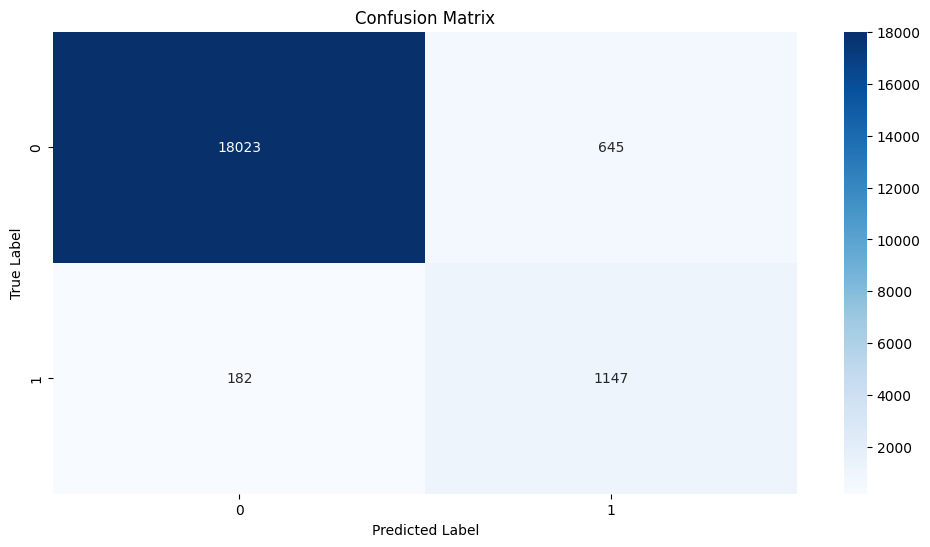

In [73]:
cm = confusion_matrix(y_pred, Y_test)

plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Save Model

In [74]:
filename = '../artifact/logistic_v1.sav'
joblib.dump(model, filename)

['../artifact/logistic_v1.sav']

In [75]:
import pickle
model_pkl_file = "../artifact/logistic_v1.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

# Load Model

In [37]:
filename = '../artifact/logistic_v1.sav'
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

ModuleNotFoundError: No module named 'numpy._core'

In [38]:
test = ((1, 32, 0, 0, 27.32, 4.8, 155, 0, 1),)

In [39]:
loaded_model.predict_proba(test)[0][1]

NameError: name 'loaded_model' is not defined

In [43]:
with open(model_pkl_file, 'rb') as file:  
    model_pickle = pickle.load(file)

# evaluate model 
y_predict = model_pickle.predict_proba(test)
y_predict

array([[0.99675563, 0.00324437]])

In [42]:
y_predict[0]

0